Mario Arya Mahardika/ 220711664/ Alexnet

In [117]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
from matplotlib import pyplot as plt

# Load data
data_dir = r"D:\ATMA\sem 5\Mesin\UAS\train_data"

batch_size = 16
img_height, img_width = 180, 180

data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

print(data.class_names)

class_names = data.class_names

Found 300 files belonging to 3 classes.
['BlackBerry', 'Blueberry', 'strawberry']


In [118]:
img_size = 180
batch = 32
validation_split = 0.1
test_split = 0.1
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch,

)

Found 300 files belonging to 3 classes.


In [119]:
total_count = len(dataset)
val_count = int(total_count * validation_split)
test_count = int(total_count * test_split)
train_count = total_count - val_count - test_count

print("Total Images:", total_count)
print("Train Images:", train_count)
print("Validation Images:", val_count)
print("Test Images:", test_count)


train_ds = dataset.take(train_count)
remaining_ds = dataset.skip(train_count)  
val_ds = remaining_ds.take(val_count)  
test_ds = remaining_ds.skip(val_count)

Total Images: 10
Train Images: 8
Validation Images: 1
Test Images: 1


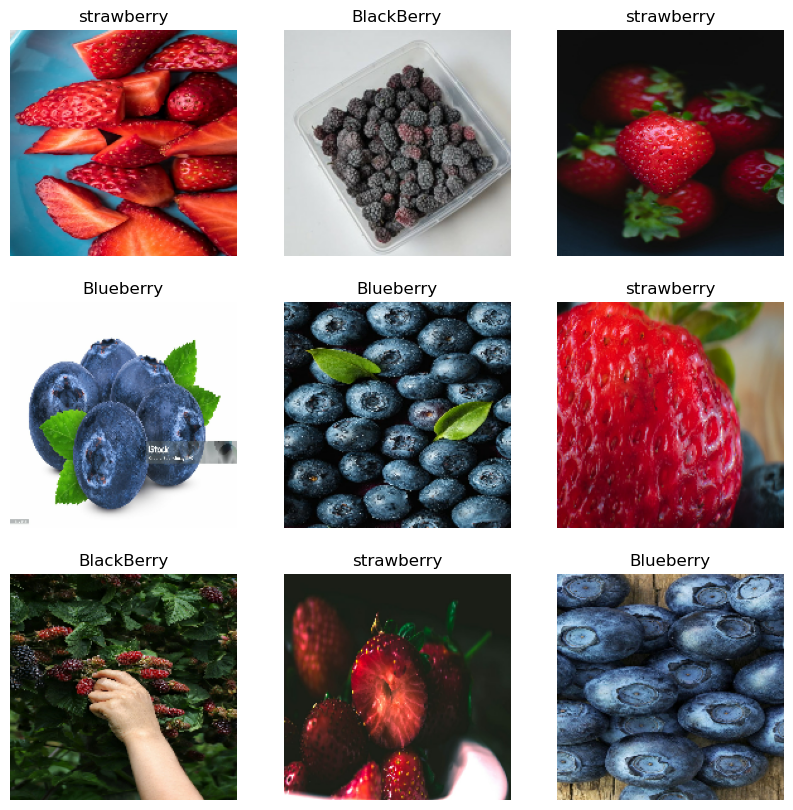

In [120]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10))


for images, labels in data.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [121]:
for images, labels in val_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape)
    

(32, 180, 180, 3)


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


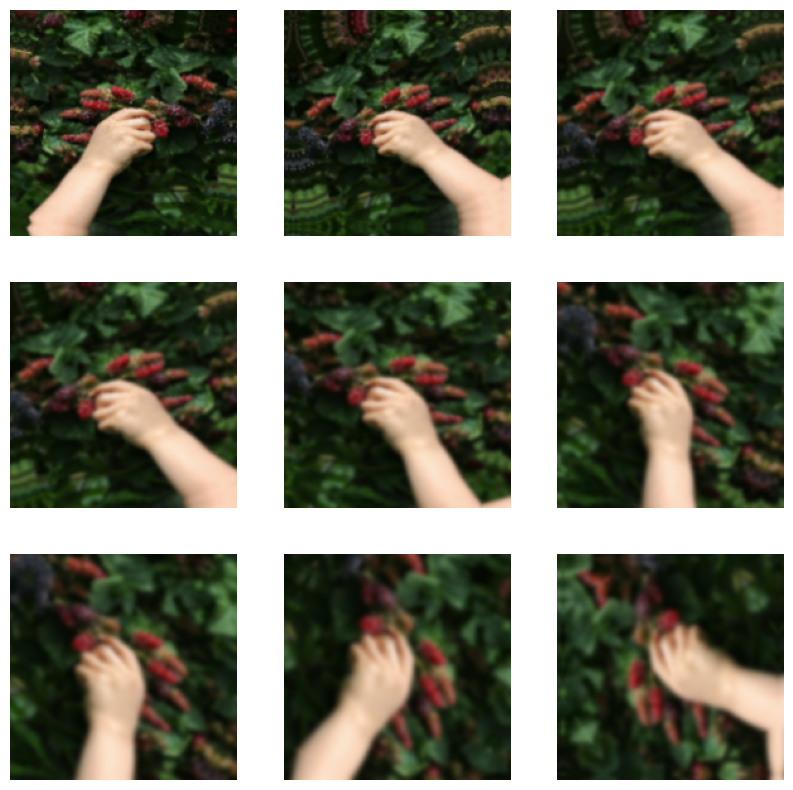

In [122]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

Tuner = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).map(
    lambda x, y: (data_augmentation(x), y)
).prefetch(buffer_size=Tuner)

val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=Tuner)


data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),  
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])


i = 0
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(69):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [123]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout


def alexnet(input_shape, n_classes):
    input = Input(input_shape)
    
    x = Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu')(input)
    x = MaxPool2D(pool_size=(3, 3), strides=(2, 2))(x)
    
    x = Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=(3, 3), strides=(2, 2))(x)
    
    x = Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu')(x)

    x = Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu')(x)
    
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=(3, 3), strides=(2, 2))(x)
    
    x = Flatten()(x)
    
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    output = Dense(n_classes, activation='softmax')(x)

    model = Model(input, output)
    return model

input_shape = (180, 180, 3)
n_classes = 2

tf.keras.backend.clear_session()
model = alexnet(input_shape, n_classes)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 43, 43, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 21, 21, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,318,018 (142.36 MB)

 Trainable params: 37,318,018 (142.36 MB)

 Non-trainable params: 0 (0.00 B)

In [124]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def alexnet(input_shape, n_classes):
    input = Input(input_shape)
    
    x = Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu')(input)
    x = MaxPool2D(pool_size=(3, 3), strides=(2, 2))(x)

    x = Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=(3, 3), strides=(2, 2))(x)
    
    x = Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu')(x)
    
    x = Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu')(x)
    
    x = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=(3, 3), strides=(2, 2))(x)

    x = Flatten()(x)

    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)

    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    output = Dense(n_classes, activation='softmax')(x)
    
    model = Model(input, output)
    return model

n_classes = len(dataset.class_names)
print("Class names:", dataset.class_names)
print("Number of classes:", n_classes)

train_ds = train_ds.map(lambda x, y: (x, tf.cast(y, tf.int32)))
val_ds = val_ds.map(lambda x, y: (x, tf.cast(y, tf.int32)))

for images, labels in train_ds.take(1):
    print("Unique labels in train dataset:", tf.unique(labels)[0].numpy())

input_shape = (180, 180, 3)
tf.keras.backend.clear_session()
model = alexnet(input_shape, n_classes)

model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    mode='max',
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    callbacks=[early_stopping]
)

val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Class names: ['BlackBerry', 'Blueberry', 'strawberry']
Number of classes: 3
Unique labels in train dataset: [0 2 1]
Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 710ms/step - accuracy: 0.3066 - loss: 233.3808 - val_accuracy: 0.3750 - val_loss: 1.3667
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 584ms/step - accuracy: 0.3435 - loss: 1.2603 - val_accuracy: 0.3750 - val_loss: 1.1420
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 583ms/step - accuracy: 0.4102 - loss: 1.0865 - val_accuracy: 0.5938 - val_loss: 0.7912
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 549ms/step - accuracy: 0.6739 - loss: 0.7244 - val_accuracy: 0.8125 - val_loss: 0.5030
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 545ms/step - accuracy: 0.7895 - loss: 0.5318 - val_accuracy: 0.6875 - val_loss: 0.5578
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 538ms/step - accuracy: 0.6380 - loss: 0.6781 - val_accuracy: 0.6875 - val_loss: 0.7847
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 543ms/step - accuracy: 0.6908 - loss: 0.8348 - val_accuracy: 0.4375 - val_loss: 0.7987


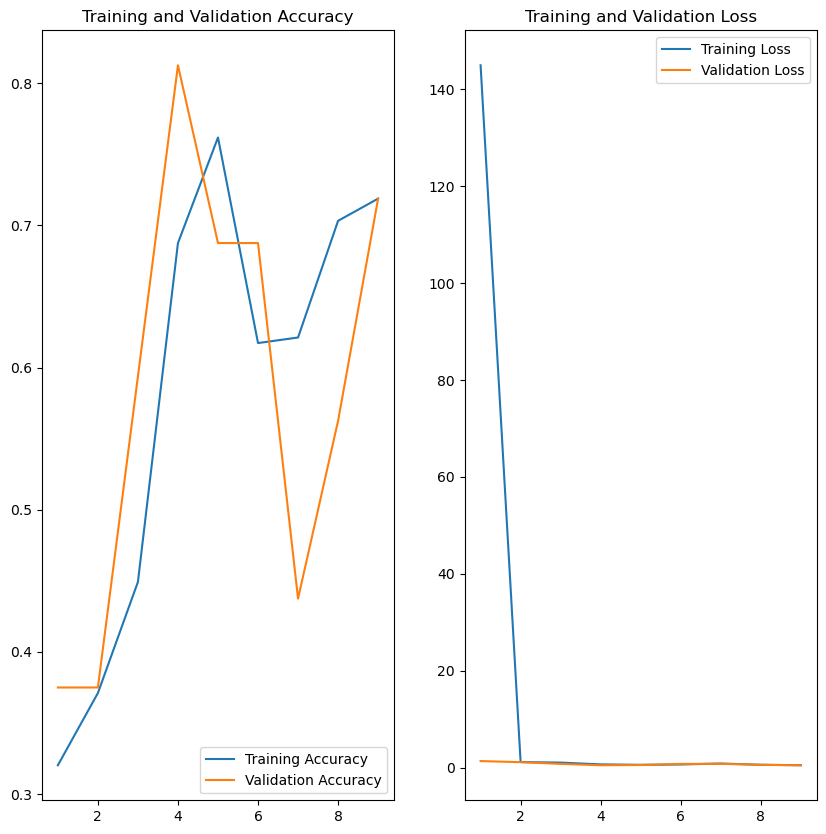

In [125]:

epochs_range = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [126]:
model.save('BestModel_AlexNet_Tensorflow.h5')

In [138]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

model = load_model(r'D:\ATMA\sem 5\Mesin\BestModel_AlexNet_Tensorflow.h5')  
class_names = ['blakcberry', 'blueberry', 'strawberry'] 

def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
        input_image_array = tf.keras.utils.img_to_array(input_image)
        input_image_exp_dim = tf.expand_dims(input_image_array, 0) 

        predictions = model.predict(input_image_exp_dim)
        result = tf.nn.softmax(predictions[0])
        class_idx = np.argmax(result)
        confidence = np.max(result) * 100

        print(f"Prediksi: {class_names[class_idx]}")
        print(f"Confidence: {confidence:.2f}%")

        input_image = Image.open(image_path)
        input_image.save(save_path)

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"

result = classify_images(r'D:\ATMA\sem 5\Mesin\UAS\test_data\strawberry\strawberry_85.jpg')
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Prediksi: strawberry
Confidence: 57.56%
Prediksi: strawberry dengan confidence 57.56%. Gambar asli disimpan di predicted_image.jpg.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


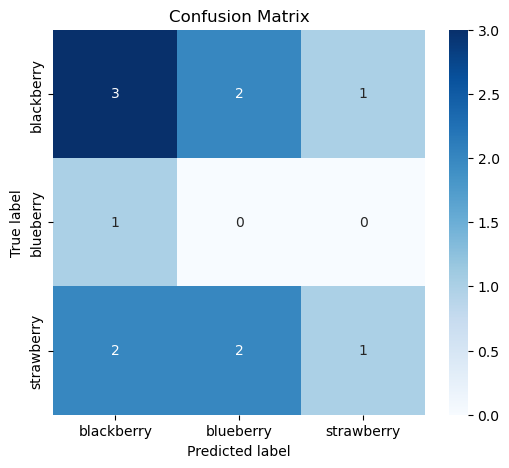

Confusion Matrix:
 [[3 2 1]
 [1 0 0]
 [2 2 1]]
Akurasi: 0.3333333333333333
Presisi: [0.5 0.  0.5]
Recall: [0.5 0.  0.2]
F1 Score: [0.5               nan 0.28571429]


In [130]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

model = load_model(r'D:\ATMA\sem 5\Mesin\BestModel_AlexNet_Tensorflow.h5')  

test_data = test_ds

class_names = ['blackberry', 'blueberry', 'strawberry']

y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1) 

true_labels = []  # Store true labels as integers
for _, labels in test_data:
    true_labels.extend(labels.numpy())

# Confusion Matrix
conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)

# Hitung metrik kinerja
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)
precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Print hasil
print("Confusion Matrix:\n", conf_mat.numpy())
print("Akurasi:", accuracy.numpy())
print("Presisi:", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score:", f1_score.numpy())
